In [1]:
import requests

url_get = requests.get('https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY')

In [2]:
url_get.content[1:777]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://monexnews.com/" target="_self" />\n<title>Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews</title>\n<meta name="description" content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " />\n<meta name="keywords" content="Kurs yen, jpy, nilai tukar yen, monexnews" />\n<meta property="og:image" content="favicon.jpg" />\n<meta name="author" content="Ultimaengine.co'

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [4]:
print(soup.prettify()[:1045])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://monexnews.com/" target="_self"/>
  <title>
   Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews
  </title>
  <meta content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " name="description"/>
  <meta content="Kurs yen, jpy, nilai tukar yen, monexnews" name="keywords"/>
  <meta content="favicon.jpg" property="og:image"/>
  <meta content="Ultimaengine.com" name="author"/>
  <meta content="follow, index" name="robots"/>
  <meta content="7 days" name="revisit-after"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="M7NOlgqcEadhl

In [5]:
table = soup.find('table', attrs={'class':'table'})
print(table.prettify()[1:500])

table class="table">
 <tr>
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   14 Mei 2020
  </td>
  <td>
   140,55
  </td>
  <td>
   139,14
  </td>
 </tr>
 <tr>
  <td>
   13 Mei 2020
  </td>
  <td>
   139,53
  </td>
  <td>
   138,10
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   12 Mei 2020
  </td>
  <td>
   140,08
  </td>
  <td>
   138,65
  </td>
 </tr>
 <tr>
  <td>
   11 Mei 2020
  </td>
  <td>
   140,51
  </td>
  <td>
  


In [6]:
tr = table.find_all('tr')
tr[:2] # just call 2 founded tr

[<tr>
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>, <tr class="verySoftGreyBg">
 <td>14 Mei 2020</td>
 <td>140,55</td>
 <td>139,14</td>
 </tr>]

In [7]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get tanggal
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip() #for removing the excess whitespace
    
    #get ask
    ask = row.find_all('td')[2].text
    ask = ask.strip() #for removing the excess whitespace
    
    #get bid
    bid = row.find_all('td')[1].text
    bid = bid.strip() #for removing the excess whitespace
    
    temp.append((tanggal, ask, bid)) 
    
temp 

[('14\xa0Mei\xa02020', '139,14', '140,55'),
 ('13\xa0Mei\xa02020', '138,10', '139,53'),
 ('12\xa0Mei\xa02020', '138,65', '140,08'),
 ('11\xa0Mei\xa02020', '139,10', '140,51'),
 ('08\xa0Mei\xa02020', '140,44', '141,86')]

In [8]:
temp = temp[::-1]
temp

[('08\xa0Mei\xa02020', '140,44', '141,86'),
 ('11\xa0Mei\xa02020', '139,10', '140,51'),
 ('12\xa0Mei\xa02020', '138,65', '140,08'),
 ('13\xa0Mei\xa02020', '138,10', '139,53'),
 ('14\xa0Mei\xa02020', '139,14', '140,55')]

In [9]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('tanggal', 'ask', 'bid'))
df.head()

,tanggal,ask,bid
0,08 Mei 2020,"140,44","141,86"
1,11 Mei 2020,"139,10","140,51"
2,12 Mei 2020,"138,65","140,08"
3,13 Mei 2020,"138,10","139,53"
4,14 Mei 2020,"139,14","140,55"


In [10]:
df['ask'] = df['ask'].str.replace(" ,","")

In [11]:
df

,tanggal,ask,bid
0,08 Mei 2020,"140,44","141,86"
1,11 Mei 2020,"139,10","140,51"
2,12 Mei 2020,"138,65","140,08"
3,13 Mei 2020,"138,10","139,53"
4,14 Mei 2020,"139,14","140,55"


In [14]:
df['ask'] = df['ask'].str.replace(",",".")
df['ask'] = df['ask'].astype('float64')
df['bid'] = df['bid'].str.replace(",",".")
df['bid'] = df['bid'].astype('float64')

df.plot()

In [16]:
df

,tanggal,ask,bid
0,08 Mei 2020,140.44,141.86
1,11 Mei 2020,139.10,140.51
2,12 Mei 2020,138.65,140.08
3,13 Mei 2020,138.10,139.53
4,14 Mei 2020,139.14,140.55


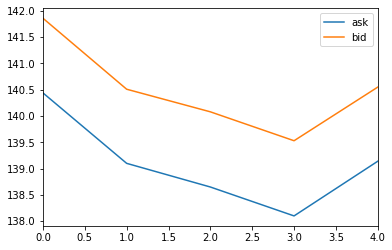

In [15]:
df.plot()